In [19]:
import os
import tensorflow as tf
import numpy as np
import itertools
import matplotlib.pyplot as plt
import gc
from datetime import datetime
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix

In [2]:
input_label = []
output_label = []
label = []

In [3]:
ficheiro = open("..\\Dataset\\02-03-2018(Time).csv", "r")

ficheiro.readline()
ficheiro.readline()
ficheiro.readline()

countLinha = 0
linha = ficheiro.readline()
while(linha != ""):
    linha = linha.split(",")
    linha.append(datetime.strptime(linha.pop(len(linha) - 1) + "", '%d/%m/%Y %H:%M:%S\n\n').time())
    label.append(linha)
    countLinha += 1
    linha = ficheiro.readline()
ficheiro.close()

In [4]:
label.sort(key = lambda array : array[len(array) - 1])

In [5]:
print(label[10])

['8080.0', '0', '6.0', '0', '11013.0', '0', '3.0', '0', '4.0', '0', '326.0', '0', '129.0', '1', '326.0', '1', '0.0', '0', '108.6666667', '0', '188.2161878', '0', '112.0', '1', '0.0', '0', '32.25', '0', '53.7672453', '0', '41314.80977', '0', '635.612458', '0', '1835.5', '0', '4021.940067', 'Bot', '10036.0', '20.0', '565.0', '282.5', '325.9762261', '513.0', '52.0', '10520.0', '3506.666667', '5657.464656', '10036.0', '61.0', '72.0', '92.0', '272.4053391', '363.2071189', '0.0', '326.0', '56.875', '115.4066568', '13318.69643', '1.0', '65.0', '108.6666667', '32.25', '3.0', '326.0', '4.0', '129.0', '8192.0', '219.0', '1.0', '20.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', datetime.time(1, 0)]


In [6]:
for i in range(len(label)):
    label[i].pop(len(label[i]) - 1)

In [7]:
b = 0
a = 0
for i in range(len(label)):
    out = label[i].pop(37)
    if(out == "Benign"):
        out = 0
        b += 1
    else:
        out = 1
        a += 1
    output_label.append(out)
    input_label.append(label[i])
    
print(str(a) + " " + str(b))

286191 758334


In [8]:
print(str(a) + " " + str(b))

286191 758334


In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(input_label)
input_label = scaler.transform(input_label)

In [10]:
inp = []
out = []
num = 0
for i in range(len(input_label) - 20 + 1):
    aux = []
    for j in range(i, i + 20):
        aux.append(input_label[j])
    inp.append(aux)
    out.append(output_label[i + 20 - 1])
        

In [11]:
inp_train, inp_test, out_train, out_test = train_test_split(inp, out, test_size = 0.2, shuffle = False)

In [12]:
input_labeL = []
output_label = []
inp = []
out = []
gc.collect()

30

In [13]:
inp_train = np.array(inp_train)#.reshape(len(inp_train), 78,1)
out_train = np.array(out_train)#.reshape(len(out_train),1)
inp_test = np.array(inp_test)#.reshape(len(inp_test), 78,1)
out_test = np.array(out_test)#.reshape(len(out_test),1)

In [14]:
print(inp_train.shape)

(835604, 20, 78)


In [15]:
model = keras.Sequential([
    layers.LSTM(units = 128, input_shape = (20, 78), return_sequences = True, use_bias = True),
    layers.LSTM(units = 64, return_sequences = True, use_bias = True),
    layers.LSTM(units = 32, return_sequences = False, use_bias = True),
    layers.Dense(units = 2, activation = "softmax")
])

In [16]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate = 0.08), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [17]:
train = model.fit(x = inp_train, y = out_train, validation_split = 0.1, epochs= 10, verbose = 1)

Epoch 1/10
23502/23502 [==============================] - 798s 33ms/step - loss: 0.0707 - accuracy: 0.9734 - val_loss: 0.0128 - val_accuracy: 0.9971
Epoch 2/10
23502/23502 [==============================] - 574s 24ms/step - loss: 0.0099 - accuracy: 0.9974 - val_loss: 0.0086 - val_accuracy: 0.9977
Epoch 3/10
23502/23502 [==============================] - 546s 23ms/step - loss: 0.0056 - accuracy: 0.9983 - val_loss: 0.0072 - val_accuracy: 0.9972
Epoch 4/10
23502/23502 [==============================] - 681s 29ms/step - loss: 0.0045 - accuracy: 0.9986 - val_loss: 0.0062 - val_accuracy: 0.9982
Epoch 5/10
23502/23502 [==============================] - 828s 35ms/step - loss: 0.0041 - accuracy: 0.9988 - val_loss: 0.0056 - val_accuracy: 0.9984
Epoch 6/10
23502/23502 [==============================] - 560s 24ms/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.0055 - val_accuracy: 0.9983
Epoch 7/10
23502/23502 [==============================] - 562s 24ms/step - loss: 0.0035 - accuracy: 0.9989

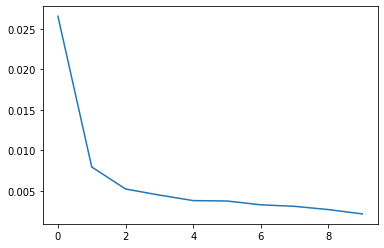

In [20]:
plt.plot(train.history["loss"])
plt.show()

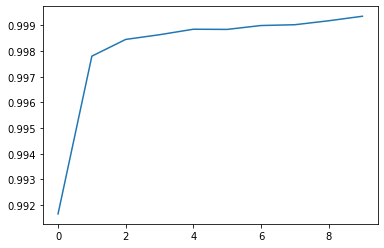

In [21]:
plt.plot(train.history["accuracy"])
plt.show()

In [22]:
model.save("LSTMBotNet(02-03-2018)V2.h5")

In [23]:
res = [np.argmax(resu) for resu in model.predict(inp_test)]

In [24]:
cm = confusion_matrix(y_true = out_test.reshape(len(out_test)), y_pred = np.array(res))

In [25]:
def plot_confusion_matrix(cm, classes, normaliza = False, title = "Confusion matrix", cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normaliza:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[133281     37]
 [   186  75398]]


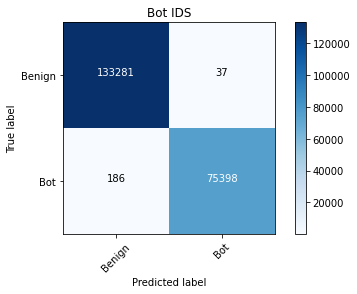

In [26]:
labels = ["Benign", "Bot"]
plot_confusion_matrix(cm = cm, classes = labels, title = "Bot IDS")